# Distributed optimization algorithms
The goal of this notebook is to work on distributed optimization algorithms, which are the foundation for large scale analytics and machine learning. Specifically, we will focus on the details of stochastic gradient descent (SGD). To do so, we will work on a simple regression problem, where we will apply SGD to minimize a loss function, as defined for the problem at hand. The emphasis of this laboratory is not on the machine learning part: even if you've never worked on regression problems, this shouldn't prevent you from being successful in developing the Notebook.

Next, an outline of the steps we will follow in this Notebook:

- Breif introduction to linear regression
- Implementation of serial algorithms: from Gradient Descent, to Stochastic Gradient Descent
- Implementation of distributed algorithms with Apache Spark

### Initialization code

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression

## Linear Regression

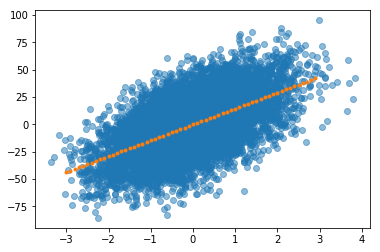

In [2]:
x, y = make_regression(n_samples = 10000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

## Batch Gradient Descent
<div class="alert alert-block alert-info">
<b>Question 1.</b> Implement your own version of Gradient Descent, as a serial algorithm. Follow the guidelines below:
Define a function to perform gradient descent. The function should accept as inputs: the training data  x  and  y , the initial guess for the parameters ( θ1  and  θ2 ), the learning rate. Additional arguments include the definition of the maximum number of iterations before the algorithm stops, and a second stop condition on the marginal improvment on the loss.
Keep track of the values of the loss, for each iteration.
Keep track of the gradient values, for each iteration.

Once the ```gradient_descent``` function is defined, you can generate input data according to the cell above, that use scikitlearn. 
The output of your cell should contain the following information:
The values of the paramters obtained through Gradient Descent optimization
The values of the paramters obtained with the above cell, using scikitlearn
A plot of the loss versus iterations
A plot of the path the gradient takes from its initial to its final position

Values of parameters obtained through Gradient Descent: 
intercept: 
0.0113213922434
slope: 
14.2786700748
Values of parameters obtained using scikitlearn
intercept: 
-0.106823564161
slope: 
14.5151694796


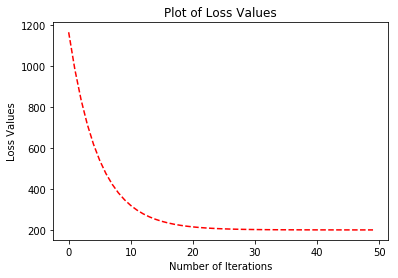

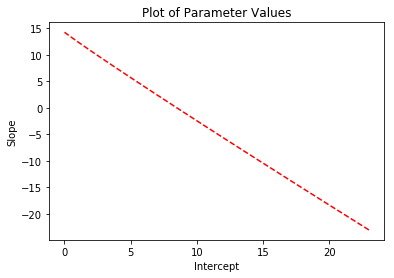

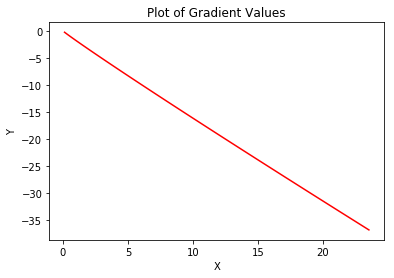

In [3]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression


### Question 1,

# f(x_i) is approximation of y (training data) and once algo runs and gets better, 
# f(x_i) changes.
# idea is to find best f(x_i) for loss function to make it as small as possible.
# data here is [[x1,y1],[x2,y2]...]
def loss_function(data, params):
    result = 0
    for elt in data: 
        result += pow(params[0] + (params[1] * elt[0]) - elt[1], 2)
    return (.5 * result)/len(data)


# theta1 is intercept
# theta2 is slope	s
# they represent the best fit line
# params are like [theta1 theta2]
# data here is [[x1,y1], [x2,y2]]
def gradient_descent(data, params, learning_rate, n_epochs, stop_cond):
    loss_vals = []
    grad_vals = []
    theta_vals = []
    
    for i in range(n_epochs):
        loss_val = loss_function(data, params)

        if len(loss_vals) == 0 or abs(loss_vals[-1] - loss_val) > stop_cond:
            loss_vals.append(loss_val)
            params_grad = evaluate_gradient(loss_val, data, params)
            
            grad_vals.append(params_grad) 
            theta_vals.append(params) 
            
            params = (params - learning_rate * params_grad) # update step. 
 
        else:
            break

    return grad_vals, loss_vals, theta_vals

#data: [[x,y],...]
def evaluate_gradient(loss_function, data, params):
    
    one_array = np.array([1]*len(data)) 
    x_vals = np.asarray([item[0] for item in data]) 
    y_vals = np.asarray([item[1] for item in data]) 
    
    x_matrix = np.column_stack((one_array,x_vals)) 
    x_theta = np.matmul(x_matrix,params)
   
    temp = x_theta-y_vals  
    
    x_transpose = np.transpose(x_matrix)

    result_num = np.matmul(x_transpose,temp)
  
    result = result_num / float(len(x_vals)) 

    return result


grad_vals_final = []
loss_vals_final_gd = []
theta_vals_final = []

data = np.array(np.asarray(list(zip(x,y)))) 

grad_vals_final, loss_vals_final_gd, theta_vals_final = gradient_descent(data, np.array([23,-23]), .1, 50, .001)

grad_vals_gradx = np.asarray([i[0] for i in list(grad_vals_final)])

grad_vals_grady = np.asarray([j[1] for j in list(grad_vals_final)])

theta_vals_theta1 = np.asarray([i[0] for i in list(theta_vals_final)])

theta_vals_theta2 = np.asarray([j[1] for j in list(theta_vals_final)])


print ("Values of parameters obtained through Gradient Descent: ")
print ("intercept: ")
print (theta_vals_final[-1][0])
print ("slope: ")
print (theta_vals_final[-1][1])

print ("Values of parameters obtained using scikitlearn")
print ("intercept: ")
print (intercept)
print ("slope: ")
print (slope)

## LOSS VALS PLOT
x_plot = list(range(len(loss_vals_final_gd)))
plt.plot(x_plot,list(loss_vals_final_gd),'r--')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Plot of Loss Values")
plt.show()

## THETA VALS PLOT
plt.plot(theta_vals_theta1, theta_vals_theta2,'r--')
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.title("Plot of Parameter Values")
plt.show()

# GRAD VALS PLOT
plt.plot(grad_vals_gradx, grad_vals_grady,'r-')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of Gradient Values")
plt.show()

# Included both plots of params and gradient values.

<div class="alert alert-block alert-info">
<b>Question 2.</b> Plot the regression line, along with the training data, given the coefficients  θ  that you have obtained with Gradient Descent.

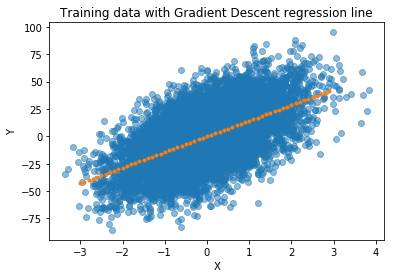

In [4]:
plt.plot(x,y,'o',alpha=0.5)
regression_line = np.vectorize(lambda x: x * theta_vals_final[-1][1] + theta_vals_final[-1][0])
grid = np.arange(-3,3,0.1)

plt.plot(grid,regression_line(grid),'.')
plt.title("Training data with Gradient Descent regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<div class="alert alert-block alert-info">
<b>Question 3.</b> Plot the path the gradient takes from its initial to its final position. This is a two dimensional plot (because our parameter vector has size 2), with a point for each gradient value, and a line connecting the points.

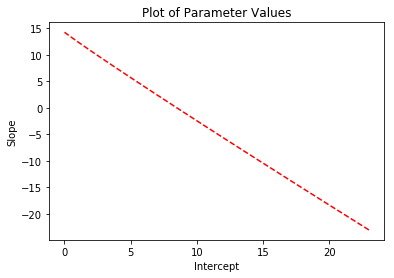

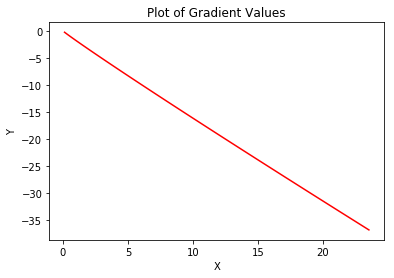

In [6]:
## THETA VALS PLOT
plt.plot(theta_vals_theta1, theta_vals_theta2,'r--')
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.title("Plot of Parameter Values")
plt.show()

# GRAD VALS PLOT
plt.plot(grad_vals_gradx, grad_vals_grady,'r-')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of Gradient Values")
plt.show()

# Included both plots of params and gradient values.

## Stochastic Gradient Descent
<div class="alert alert-block alert-info">
<b>Question 4.</b> Implement your own version of Stochastic Gradient Descent, as a serial algorithm. Follow the guidelines below:
- Define a function to perform gradient descent. The function should accept as inputs: the training data  x  and  y , the initial guess for the parameters ( θ1  and  θ2 ), the learning rate. Additional arguments include the definition of the maximum number of iterations before the algorithm stops, and a second stop condition on the marginal improvment on the loss.
- Keep track of the values of the loss, for each iteration.
- Keep track of the gradient values, for each iteration.

Once the ```gradient_descent``` function is defined, you can generate input data according to the cell above, that use scikitlearn. 
The output of your cell should contain the following information:
- The values of the paramters obtained through Gradient Descent optimization
- The values of the paramters obtained with the above cell, using scikitlearn
- A plot of the loss versus iterations
- A plot of the path the gradient takes from its initial to its final position

Values of parameters obtained through Gradient Descent: 
intercept: 
0.0554698528547
slope: 
12.5864552646
Values of parameters obtained using scikitlearn
intercept: 
-0.106823564161
slope: 
14.5151694796


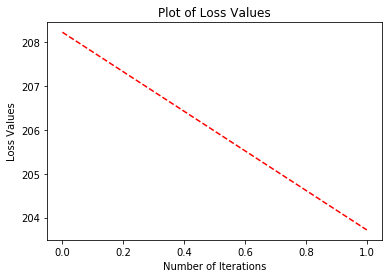

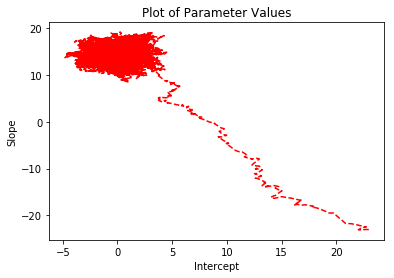

In [7]:
def stoch_gradient_descent(data, params, learning_rate, n_epochs, stop_cond):

    loss_vals = []
    grad_vals = []
    theta_vals = []

    for i in range(n_epochs):
        
        np.random.shuffle(data)
        
        loss_vals_epoch = []

        for example in data: # 10,000
            example = np.asarray([example]) 
            loss_val = loss_function(example, params)


            loss_vals_epoch.append(loss_val)
                
            params_grad = evaluate_gradient(loss_val, example, params)
            grad_vals.append(params_grad)
            params = params - learning_rate * params_grad
            theta_vals.append(params)

        avg_loss_val = sum(loss_vals_epoch)/len(loss_vals_epoch)
        if len(loss_vals) == 0 or abs(loss_vals[-1] - avg_loss_val) > stop_cond:
            loss_vals.append(avg_loss_val)
        else:
            break
        

    return grad_vals, loss_vals, theta_vals


grad_vals_final, loss_vals_final_sgd, theta_vals_final = stoch_gradient_descent(data, np.array([23,-23]), .01, 50, .01)

grad_vals_gradx = np.asarray([i[0] for i in grad_vals_final])

grad_vals_grady = np.asarray([j[1] for j in grad_vals_final])

theta_vals_theta1 = np.asarray([i[0] for i in theta_vals_final])

theta_vals_theta2 = np.asarray([j[1] for j in theta_vals_final])


print ("Values of parameters obtained through Gradient Descent: ")
print ("intercept: ")
print (theta_vals_final[-1][0])
print ("slope: ")
print (theta_vals_final[-1][1])

print ("Values of parameters obtained using scikitlearn")
print ("intercept: ")
print (intercept)
print ("slope: ")
print (slope)

## LOSS VALS PLOT
x_plot = list(range(len(loss_vals_final_sgd)))
plt.plot(x_plot,list(loss_vals_final_sgd),'r--')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Plot of Loss Values")
plt.show()

## THETA VALS PLOT
plt.plot(theta_vals_theta1, theta_vals_theta2,'r--')
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.title("Plot of Parameter Values")
plt.show()

## Mini-Batch Stochastic Gradient Descent
<div class="alert alert-block alert-info">
<b>Question 5.</b> Implement your own version of Mini-batch Stochastic Gradient Descent, as a serial algorithm. Follow the guidelines below:
- Define a function to extract mini-batches from the training data.
- Define a function to perform gradient descent. The function should accept as inputs: the training data  x  and  y , the initial guess for the parameters ( θ1  and  θ2 ), the learning rate. Additional arguments include the definition of the maximum number of iterations before the algorithm stops, and a second stop condition on the marginal improvment on the loss.
- Keep track of the values of the loss, for each iteration.
- Keep track of the gradient values, for each iteration.

Once the ```gradient_descent``` function is defined, you can generate input data according to the cell above, that use scikitlearn. 
The output of your cell should contain the following information:
- The values of the paramters obtained through Gradient Descent optimization
- The values of the paramters obtained with the above cell, using scikitlearn
- A plot of the loss versus iterertions
- A plot of the path the gradient takes from its initial to its final position

Values of parameters obtained through Gradient Descent: 
intercept: 
-0.0253360130452
slope: 
14.4856226837
Values of parameters obtained using scikitlearn
intercept: 
-0.106823564161
slope: 
14.5151694796


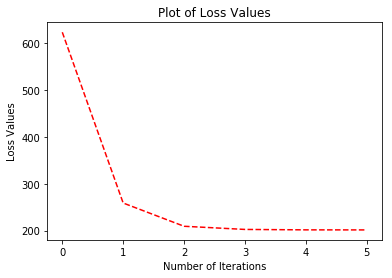

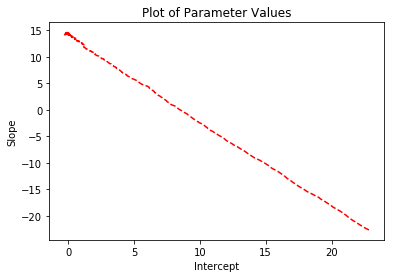

In [8]:
# Parameters: data is the full training set of [[x y]...]
# Size is the number we want to cut down to
def extractBatch(data,start,size):
    newBatch = np.array([])
    firstTime_mb = True
    
    for i in range(size):
        if firstTime_mb:
            newBatch = np.array([data[start + i]])
            #print ("newBatch")
            #print (newBatch)
            firstTime_mb = False
        else:
            newBatch = np.append(newBatch, [data[start + i]],axis=0)
    return newBatch

    
def mb_gradient_descent(data, params, learning_rate, n_epochs, stop_cond):

    loss_vals = []
    grad_vals = []
    theta_vals = []

    mb_size = 100

    for i in range(n_epochs):

        np.random.shuffle(data)
        start = 0
        loss_vals_epoch = []

        for idx, example in enumerate(data): # 10,000
            if idx % mb_size == 0:
                mb = extractBatch(data,start,mb_size)
                start += mb_size

                loss_val = loss_function(mb, params) 
                loss_vals_epoch.append(loss_val)
                    
                params_grad = evaluate_gradient(loss_val, mb, params)
                grad_vals.append(params_grad)
                params = params - learning_rate * params_grad
                theta_vals.append(params)

            
        avg_loss_val = sum(loss_vals_epoch)/len(loss_vals_epoch)
        if len(loss_vals) == 0 or abs(loss_vals[-1] - avg_loss_val) > stop_cond:
            loss_vals.append(avg_loss_val)
        else:
            break
        
    return grad_vals, loss_vals, theta_vals

grad_vals_final, loss_vals_final_mb, theta_vals_final = mb_gradient_descent(data, np.array([23,-23]), .01, 50, .05)


grad_vals_gradx = np.asarray([i[0] for i in grad_vals_final])

grad_vals_grady = np.asarray([j[1] for j in grad_vals_final])

theta_vals_theta1 = np.asarray([i[0] for i in theta_vals_final])

theta_vals_theta2 = np.asarray([j[1] for j in theta_vals_final])

print ("Values of parameters obtained through Gradient Descent: ")
print ("intercept: ")
print (theta_vals_final[-1][0])
print ("slope: ")
print (theta_vals_final[-1][1])

print ("Values of parameters obtained using scikitlearn")
print ("intercept: ")
print (intercept)
print ("slope: ")
print (slope)

## LOSS VALS PLOT
x_plot = list(range(len(loss_vals_final_mb)))
plt.plot(x_plot,list(loss_vals_final_mb),'r--')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Plot of Loss Values")
plt.show()

## THETA VALS PLOT
plt.plot(theta_vals_theta1, theta_vals_theta2,'r--')
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.title("Plot of Parameter Values")
plt.show()

<div class="alert alert-block alert-info">
<b>Question 6.</b> Compare the loss rate of the three approachs, Gradient Descent, Stochastic Gradient Descent, Mini-batch Stochastic Gradient Descent, by plotting in the same figure, the loss rate as a function of iterations. Comment the behavior of the three algorithms.

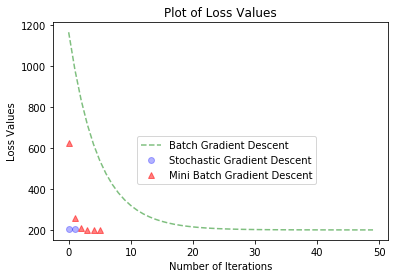

In [9]:
## LOSS VALS PLOT
fig, ax = plt.subplots()
x_plot_gd = list(range(len(loss_vals_final_gd)))
x_plot_sgd = list(range(len(loss_vals_final_sgd)))
x_plot_mb = list(range(len(loss_vals_final_mb)))

ax.set_xlabel("Number of Iterations")
ax.set_ylabel("Loss Values")
plt.title("Plot of Loss Values")

ax.plot(x_plot_gd,list(loss_vals_final_gd),'g--',alpha=0.5,label="Batch Gradient Descent")
ax.plot(x_plot_sgd,list(loss_vals_final_sgd),'bo',alpha=0.3,label="Stochastic Gradient Descent")
ax.plot(x_plot_mb,list(loss_vals_final_mb),'r^',alpha=0.5,label="Mini Batch Gradient Descent")

ax.legend(bbox_to_anchor=(.8,.5))

plt.show()

### Comments: 
The gradient descent line (in green) starts from the highest loss value, as it considers the sum of all loss values over each point in the training sample. However, with stochastic gradient descent (in blue) and mini-batch gradient descent (in red), the loss value starts at a lower point as they take the sum of loss values over a smaller sample (stochastic considers only 1 sample, so the loss value starts very low, whereas our minibatch code has a sample size of 100, so it's in the middle). However, in the beginning, they all decrease at a quick rate and then eventually level out. We notice that batch gradient descent takes a longer number of epochs to find the optimum point than either of the others, with mini batch in the middle. Finally, with the stochastic and mini-batch versions, the loss values hover around the optimal loss value, as the algorithm circles around the optimum solution, whereas the batch gradient descent algorithm finds the optimal solution.

## Distributed Mini-Batch Stochastic Gradient Descent
<div class="alert alert-block alert-info">
<b>Question 7.</b> Implement your own version of Mini-Batch, Stochastic Gradient Descent, as a **distributed** algorithm. The output of your cell should contain the following information:
- The values of the paramters obtained through Gradient Descent optimization
- The values of the paramters obtained with the above cell, using scikitlearn
- A plot of the loss versus iterations
- A plot of the path the gradient takes from its initial to its final position

Values of parameters obtained through Gradient Descent: 
intercept: 
0.0145044048551
slope: 
14.2551570596
Values of parameters obtained using scikitlearn
intercept: 
-0.106823564161
slope: 
14.5151694796


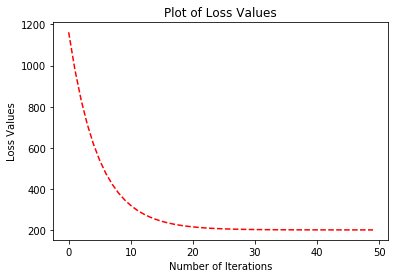

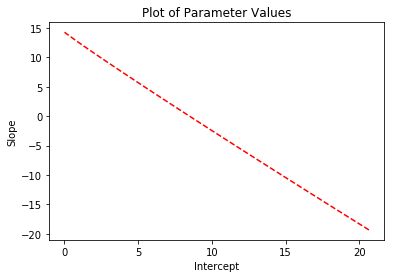

In [10]:
import pyspark as py

def workerFunction(iterable):
    iterable = list(iterable)

    params = bcast_params.value
    loss_val = loss_function(iterable, params)
    params_grad = evaluate_gradient(loss_val, iterable, params)
    params = params - learning_rate * params_grad

    yield params_grad, loss_val, params

rdd = sc.parallelize(data, 4)

params = np.array([23,-23])
learning_rate = 0.1
n_epochs = 50
stop_cond = .1

  
finalListOfParamsGrad = []
finalListOfLossVals = []
finalListOfParams = []

for i in range(n_epochs):
    mini_batches = rdd.sample(False, 1, 3+i) # sample w/o replacement, whole dataset, random seed

    bcast_params = sc.broadcast(params)

    rddResult = mini_batches.mapPartitions(workerFunction).collect()

    listOfParamsGrad = []
    listOfLossVals = []
    listOfParams = []
        
    avgParam = []
    for i in rddResult: #four i's in each rddResult
        listOfParamsGrad.append(i[0])
        listOfLossVals.append(i[1])
        listOfParams.append(i[2])
    if (len(listOfLossVals) == 0 or abs(np.mean(listOfLossVals, axis=0)-listOfLossVals[-1]) > stop_cond):
        finalListOfParamsGrad.append(np.mean(listOfParamsGrad, axis=0))
        finalListOfLossVals.append(np.mean(listOfLossVals, axis=0))
        finalListOfParams.append(np.mean(listOfParams, axis=0))
    else:
        break
    params = np.mean(listOfParams, axis=0)

grad_vals_gradx = np.asarray([i[0] for i in finalListOfParamsGrad])

grad_vals_grady = np.asarray([j[1] for j in finalListOfParamsGrad])

theta_vals_theta1 = np.asarray([i[0] for i in finalListOfParams])

theta_vals_theta2 = np.asarray([j[1] for j in finalListOfParams])

print ("Values of parameters obtained through Gradient Descent: ")
print ("intercept: ")
print (finalListOfParams[-1][0])
print ("slope: ")
print (finalListOfParams[-1][1])

print ("Values of parameters obtained using scikitlearn")
print ("intercept: ")
print (intercept)
print ("slope: ")
print (slope)

## LOSS VALS PLOT
x_plot = list(range(len(finalListOfLossVals)))
plt.plot(x_plot,list(finalListOfLossVals),'r--')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Plot of Loss Values")
plt.show() #don't think it should have changed

## THETA VALS PLOT
plt.plot(theta_vals_theta1, theta_vals_theta2,'r--')
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.title("Plot of Parameter Values")
plt.show()


<div class="alert alert-block alert-info">
<b>Question 8.</b> Inspecting your input data, and its partitioning. 
Answer the following questions:
- What is the best way to partition your data, given your cluster configuration? How many partitions did you chose
- Given the number of partitions from the first point, how many RDD blocks is your data broken into?
- What would be different if you were to concieve the same algorithm digesting input data stored as a CSV file on HDFS? Argue about how to "ship" data to worker machines, partitions, blocks, etc...

Answers:<p>
    
- What is the best way to partition your data, given your cluster configuration? How many partitions did you chose?
    - We chose four partitions because we wanted each worker (of which there are four) to have roughly the same amount of data to work on.
- Given the number of partitions from the first point, how many RDD blocks is your data broken into?
    - Our data is broken into 4 RDD blocks, due to the four partitions.
- What would be different if you were to concieve the same algorithm digesting input data stored as a CSV file on HDFS? Argue about how to "ship" data to worker machines, partitions, blocks, etc...
    - Spark operates on everything in memory, if the data can fit, and then writes to disk. So with generated data, it’s already in memory and there’s no need to read it in from a disk. With HDFS, you would need to read the data into memory, and this is a slow. With HDFS, the best choice is to ship the function code to the workers (and partitions), who already possess the data, as this is typically smaller than our data.

<div class="alert alert-block alert-info">
<b>Question 9.</b> Finding bottlenecks.
- What is the bottleneck in the current implementation of your algorithm?
- Can you nail down exactly which method is causing this bottleneck?
- Can you suggest ways to mitigate or eliminate the bottleneck?

- What is the bottleneck in the current implementation of your algorithm?

    - Currently, the run-time is taken up mostly by mapPartitions, and as all workers need to finish their tasks before moving on to the next iteration, the wait-time is the main bottleneck in this algorithm. We see that the difference in time between when the first and last worker completes their last task can be significant, and this loss of time, due to waiting for all the workers to finish, is multiplied by the number of epochs.
- Can you nail down exactly which method is causing this bottleneck?

    - The worker function, performed on the workers when mapPartitions is called, causes the bottleneck. Or rather, the difference between completion times amongst the workers.
- Can you suggest ways to mitigate or eliminate the bottleneck?

    - We could mitigate the bottleneck by ensuring that all workers process the same amount of workload, are similar machines, have similar other jobs running, etc. We could also divide the data up differently. By increasing the number of partitions, the effect of stragglers would be reduced as the free partitions could be assigned to fast workers. Yet with too many partitions, we could run into the problem that scheduling tasks eats up more time than executing them. ([source]( https://techmagie.wordpress.com/2015/12/19/understanding-spark-partitioning/))

<div class="alert alert-block alert-info">
<b>Question 10.</b> Comparison of serial vs. distributed algorithms.

Given all the implementation effort you did so far, this question is about an experimental study on scalability. Given input data sizes in the range  [$10^{2}$,$10^{3}$,$10^{4}$,$10^{5}$] , collect the run-time and the loss rate at convergence for all variants of the serial algorithms and for the distributed one. Produce a plot with 2 y-axis, one for the run-time, one for the loss rate, and one x-axis with the input data size.

Discuss your results.

In [11]:
import time


def make_regression_n(numData):
    x,y = make_regression(n_samples = numData, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
    return x,y


gd_run_t = []
sgd_run_t = []
mb_run_t = []
dmb_run_t = []

gd_loss_vals = []
sgd_loss_vals = []
mb_loss_vals = []
dmb_loss_vals = []

for i in range(0,4):

#    print("GD")
    exp = (i+2)
    numData = pow(10, exp)
    x,y = make_regression_n(numData)
    data = np.array(np.asarray(list(zip(x,y))))
    
    ####    GD ####
    start_time = time.time()
    grad_vals_final, loss_vals_final, theta_vals_final = gradient_descent(data, np.array([23,-23]), .1, 50, .01)
    end_time = time.time()
    total_time = end_time - start_time
    
   
    gd_loss_vals.append(loss_vals_final[-1])
    gd_run_t.append(total_time)

     ####    SGD ####
    start_time = time.time()
    grad_vals_final, loss_vals_final, theta_vals_final = stoch_gradient_descent(data, np.array([23,-23]), .01, 50, .01)
    end_time = time.time()
    total_time = end_time - start_time
    
    
    sgd_loss_vals.append(loss_vals_final[-1])
    sgd_run_t.append(total_time)
    
     ####    MB ####
    
    start_time = time.time()
    grad_vals_final, loss_vals_final, theta_vals_final = mb_gradient_descent(data, np.array([23,-23]), .01, 50, .05)
    end_time = time.time()
    total_time = end_time - start_time
    
    
    mb_loss_vals.append(loss_vals_final[-1])
    mb_run_t.append(total_time)
    
     ####    DMB ####    
    start_time = time.time()
    rdd = sc.parallelize(data, 4)
    params = np.array([23,-23])
    learning_rate = 0.1
    n_epochs = 50
    stop_cond = .1
    finalListOfParamsGrad = []
    finalListOfLossVals = []
    finalListOfParams = []
    for i in range(n_epochs):
        mini_batches = rdd.sample(False, 1, 3+i) # sample w/o replacement, whole dataset, random seed
        bcast_params = sc.broadcast(params)
        rddResult = mini_batches.mapPartitions(workerFunction).collect()
        listOfParamsGrad = []
        listOfLossVals = []
        listOfParams = []
        avgParam = []
        for i in rddResult: #four i's in each rddResult

            listOfParamsGrad.append(i[0])
            listOfLossVals.append(i[1])
            listOfParams.append(i[2])
        finalListOfParamsGrad.append(np.mean(listOfParamsGrad, axis=0))
        finalListOfLossVals.append(np.mean(listOfLossVals, axis=0))
        finalListOfParams.append(np.mean(listOfParams, axis=0))
        params = np.mean(listOfParams, axis=0)

    end_time = time.time()
    total_time = end_time - start_time 
        
    
    dmb_loss_vals.append(loss_vals_final[-1])
    dmb_run_t.append(total_time)
    

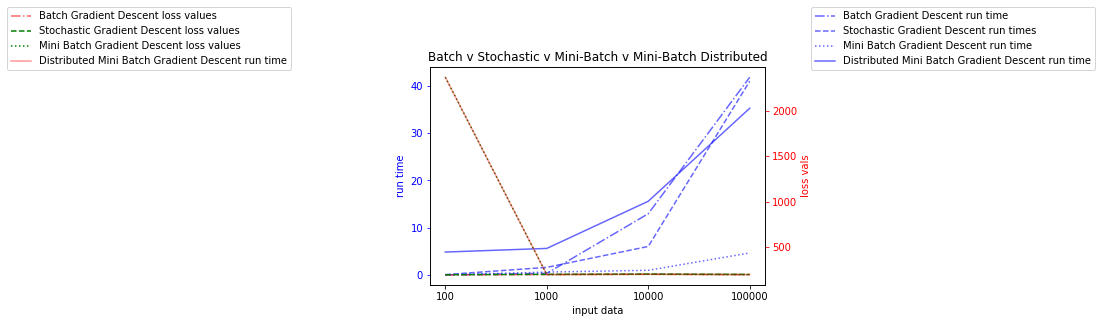

In [12]:
# SET UP
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = ["100","1000","10000","100000"]
xticks = np.arange(0,4)
plt.xticks(xticks,my_xticks)
ax1.set_xlabel('input data')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('run time', color='b')
ax1.tick_params('y', colors='b')
ax2.set_ylabel('loss vals', color='r')
ax2.tick_params('y', colors='r')

## GRADIENT DESCENT PLOT
ax1.plot(xticks, gd_run_t, 'b-.', label='Batch Gradient Descent run time', alpha=0.6)
ax2.plot(xticks, gd_loss_vals, 'r-.', label='Batch Gradient Descent loss values', alpha=0.6)

## STOCHASTIC GRADIENT DESCENT PLOT
ax1.plot(xticks, sgd_run_t, 'b--', label='Stochastic Gradient Descent run times', alpha=0.6)
ax2.plot(xticks, sgd_loss_vals, 'g--', label='Stochastic Gradient Descent loss values')

## MINI-BATCH GRADIENT DESCENT PLOT
ax1.plot(xticks, mb_run_t, 'b:', label='Mini Batch Gradient Descent run time', alpha=0.6)
ax2.plot(xticks, mb_loss_vals, 'g:', label='Mini Batch Gradient Descent loss values')

## MINI-BATCH DISTRIBUTED GRADIENT DESCENT PLOT
ax1.plot(xticks, dmb_run_t, 'b-', label='Distributed Mini Batch Gradient Descent run time', alpha=0.6)
ax2.plot(xticks, dmb_loss_vals, 'r-', label='Distributed Mini Batch Gradient Descent run time', alpha=0.4)

# add titles and legend
plt.title("Batch v Stochastic v Mini-Batch v Mini-Batch Distributed")
ax1.legend(bbox_to_anchor=(2,1.3))
ax2.legend(bbox_to_anchor=(-.4,1.3))

plt.show()

## Comments
For the runtimes, we see that initially batch gradient descent is efficient for small amounts of data, but for larger ones it is the slowest by far, due to the large matrix computations.
The runtime of the distributed mini batch gradient descent starts off as a flat line for small amounts of data, where performance gains are overshadowed by the cost of parallelism. Eventually the line starts to increase as the data grows large, as is to be expected. Its sample size is 1, so we still process all of the data, but the parallelism allows it to run slightly faster than the batch gradient descent at the 2 largest data sizes.

Our serial minibatch gradient descent run times are quite good even for large amounts of data, since the batch size is only 100, so matrix computations aren’t as large as in the batch or distributed minibatch cases.

For all of these runtimes, the choice of a stop condition might have an effect, and is different amongst the different algorithms because of the different rates of convergence.

We would expect that the stochastic should be faster than the minibatch code for large amounts of data, though this isn’t the case, perhaps because we don’t exploit numpy whenever possible and only use it for matrix calculations.

The loss value graph shows us the final loss value for each case, and because all of them have converged, we would expect a straight line, or an approximation of a straight line, for all cases. The only time we don’t see this is with the smallest data size in distributed minibatch and minibatch, which are almost exactly the same. In other words, as the size of the input data and the amount of data averaged decreases, we see higher loss values.

Meanwhile, the loss values for batch gradient descent and stochastic gradient descent are also almost the same, as in both of these cases, for all data inputs sizes, they converge to close to the optimal solution in the specified number of epochs. So these two lines have a slope of about zero, and an intercept of about 200.